In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape,y.shape)
Xnp= X.to_numpy()
print(Xnp.shape)

(70000, 784) (70000,)
(70000, 784)


In [3]:
ynp=y.to_numpy()

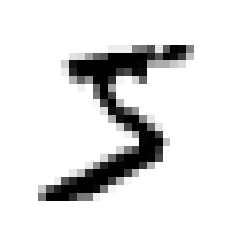

5


In [4]:
some_digit = Xnp[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()
print(y[0])

In [5]:
#algumas definições úteis
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

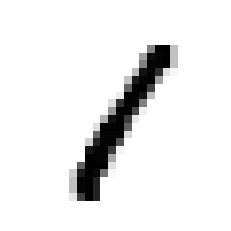

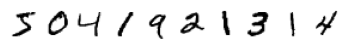

In [6]:
plot_digit(Xnp[3])
plt.show()
plot_digits(Xnp[0:10])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnp,ynp,test_size=10000,random_state=42)

In [8]:
y_train_5 = (y_train == '5')
y_test_5  = (y_test == '5')

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

[ True]


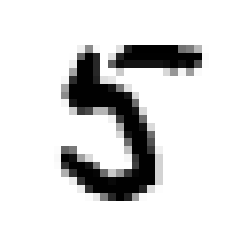

[False]


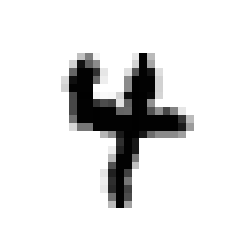

In [10]:
print(sgd_clf.predict([X_test[15]]))
plot_digit(X_test[15])
plt.show()
print(sgd_clf.predict([X_test[1]]))
plot_digit(X_test[1])
plt.show()

In [11]:
y_predict_5 = sgd_clf.predict(X_test)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score

print(cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy"))

[0.9629  0.96775 0.96435]


In [13]:
print("acuracia = {:2.3f} ".format(accuracy_score(y_test_5,y_predict_5)))
print("precisao = {:2.3f} e eficiencia = {:2.3f}".format(precision_score(y_test_5,y_predict_5),recall_score(y_test_5,y_predict_5)))

acuracia = 0.966 
precisao = 0.853 e eficiencia = 0.767


In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [15]:
never_5_clf = Never5Classifier()
print(cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy"))
y_pred_never_5=never_5_clf.predict(X_test)
print(accuracy_score(y_test_5,y_pred_never_5))

[0.9119  0.90875 0.91055]
0.9063


In [16]:
print(precision_score(y_test_5,y_pred_never_5),recall_score(y_test_5,y_pred_never_5))

0.0 0.0


/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
y_train_predallzero = never_5_clf.predict(X_train)
y_train_predperfect = y_train_5

In [19]:
from sklearn.metrics import confusion_matrix
print("Test sample confusion matrix")
print(confusion_matrix(y_test_5,y_predict_5))
print("\n")
print("Training sample confusion matrix")
print(confusion_matrix(y_train_5, y_train_pred))

Test sample confusion matrix
[[8939  124]
 [ 218  719]]


Training sample confusion matrix
[[54103   521]
 [ 1579  3797]]


In [20]:
print("Perfect score confusion matrix")
print(confusion_matrix(y_train_5, y_train_predperfect))

Perfect score confusion matrix
[[54624     0]
 [    0  5376]]


In [21]:
print("Never 5 confusion matrix")
print(confusion_matrix(y_train_5, y_train_predallzero))

Never 5 confusion matrix
[[54624     0]
 [ 5376     0]]


In [22]:
print("precision {:2.1f}%".format(100*precision_score(y_train_5, y_train_pred)))
print("recall {:2.1f}%".format(100*recall_score(y_train_5,y_train_pred)))

precision 87.9%
recall 70.6%


In [23]:
y_scores = sgd_clf.decision_function(X_train)
y_scores[0]

-14144.5060620584

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [25]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print("Ponto de corte onde alcança precisão >90% :",threshold_90_precision)

recall_90_precision = recalls[np.argmax(precisions>=0.9)]
print("Eficiência para aquele ponto de corte (precisão>90%) :", recall_90_precision)

Ponto de corte onde alcança precisão >90% : 483.11475110863324
Eficiência para aquele ponto de corte (precisão>90%) : 0.7345610119047619


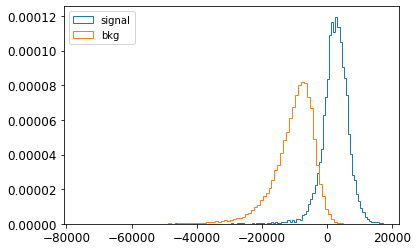

In [26]:
plt.hist(y_scores[y_train_5],histtype='step',density=True,label='signal',bins=100)
plt.hist(y_scores[~y_train_5],histtype='step',density=True,label='bkg',bins=100)
plt.legend()
plt.show()

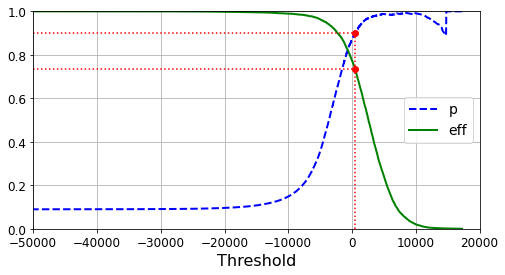

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="p", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="eff", linewidth=2)
    plt.legend(loc="center right", fontsize=14)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 20000, 0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

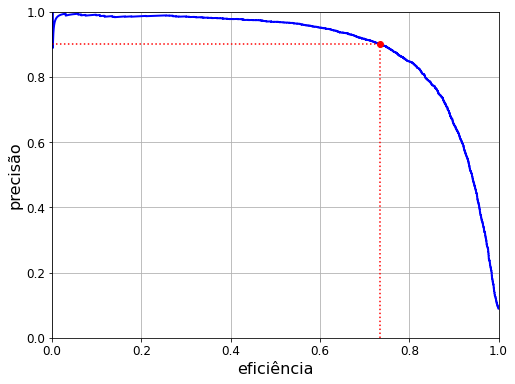

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("eficiência", fontsize=16)
    plt.ylabel("precisão", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [29]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
print("Precisão (>90%): {:2.2%}".format (precision_score(y_train_5,y_train_pred_90)))
print("Acurácia para precisão > 90%: {:2.2%} ".format(accuracy_score(y_train_5,y_train_pred_90)))
rec_point = recall_score(y_train_5,y_train_pred_90)
print("Eficiência para precisão > 90%: {:2.2%}".format(rec_point))

Precisão (>90%): 90.02%
Acurácia para precisão > 90%: 96.89% 
Eficiência para precisão > 90%: 73.46%


In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [31]:
fpr_point = fpr[np.argmax(thresholds<=threshold_90_precision)]
print("{:2.4e}".format(fpr_point))

## entrega o valor de taxa de falsos positivos no ponto de corte que achamos precisão >90%

8.0368e-03


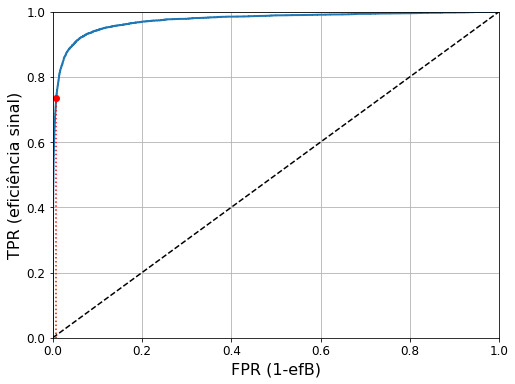

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('FPR (1-efB)', fontsize=16) # Not shown
    plt.ylabel('TPR (eficiência sinal)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([fpr_point, fpr_point], [0., rec_point], "r:") # Not shown
plt.plot([0.0, fpr_point], [rec_point, rec_point], "r:")  # Not shown
plt.plot([fpr_point], [rec_point], "ro")               # Not shown
                        # Not shown
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

AUC=roc_auc_score(y_train_5, y_scores)
print(AUC)

0.9741394824488451


In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [35]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
prec_forest, rec_forest, threshs_frst = precision_recall_curve(y_train_5, y_scores_forest)

In [36]:
thr_frst_90 = threshs_frst[np.argmax(prec_forest>=0.9)]
print("limiar para precision de 0.9 ===>  ", thr_frst_90)
y_pred_frst_90 = (y_scores_forest >= thr_frst_90)
rec_pnt_frst = rec_forest[np.argmax(y_pred_frst_90)]
fpr_pnt_frst = fpr_forest[np.argmax(y_pred_frst_90)]
print("recall neste limiar = ", rec_pnt_frst)
print("taxa de falsos positivos neste limiar= ",fpr_pnt_frst)

limiar para precision de 0.9 ===>   0.24
recall neste limiar =  0.9719122023809523
taxa de falsos positivos neste limiar=  7.322788517867604e-05


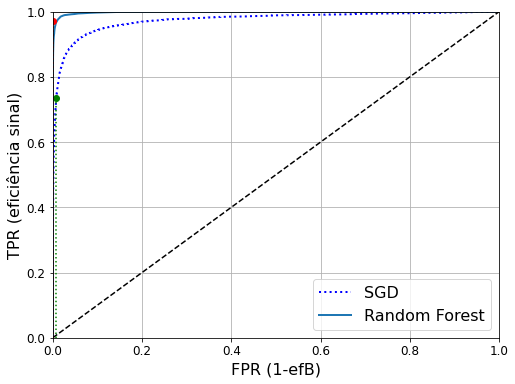

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_point, fpr_point], [0., rec_point], "g:")
plt.plot([0.0, fpr_point], [rec_point, rec_point], "g:")
plt.plot([fpr_point], [rec_point], "go")
plt.plot([fpr_pnt_frst, fpr_pnt_frst], [0., rec_pnt_frst], "r:")
plt.plot([fpr_pnt_frst], [rec_pnt_frst], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9984563317302746

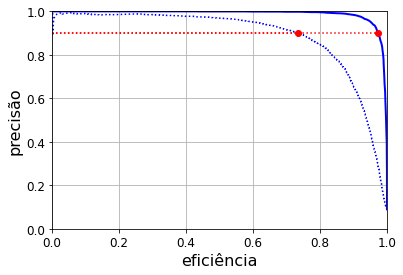

In [39]:
plt.plot(recalls,precisions,"b:")
plot_precision_vs_recall(prec_forest,rec_forest)
plt.plot([0,rec_point],[0.9,0.9],"r:")
plt.plot([rec_point],[0.9],"ro")
plt.plot([0,rec_pnt_frst],[0.9,0.9],"r:")
plt.plot([rec_pnt_frst],[0.9],"ro")
plt.show()

In [40]:
from sklearn.metrics import f1_score
## f1 = (p*r)/(p+r)
print("Score F1 para SGD ",f1_score(y_train_5, y_train_pred_90))
print("Score F1 para Random Forest ",f1_score(y_train_5, y_pred_frst_90))

Score F1 para SGD  0.808972651848817
Score F1 para Random Forest  0.9381452554089236


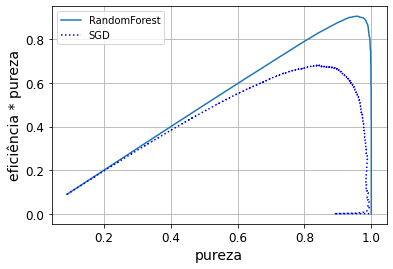

In [41]:
plt.plot(prec_forest,prec_forest*rec_forest,label="RandomForest")
plt.plot(precisions,precisions*recalls,"b:",label="SGD")
plt.grid(True)
plt.xlabel("pureza")
plt.ylabel("eficiência * pureza")
plt.legend(loc="upper left")
plt.show()

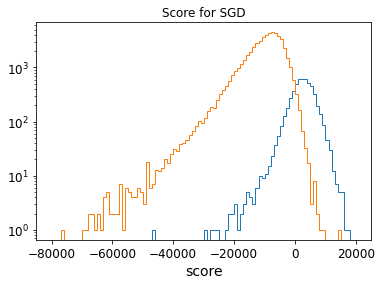

In [42]:
y_scores_only_signals = y_scores[y_train_5]
y_scores_only_backg = y_scores[~y_train_5]
#h = np.histogram(y_scores_only_signals,bins=100,range(0,1000))
plt.hist(y_scores_only_signals,bins=100,range=(-80000,20000),histtype="step")
plt.hist(y_scores_only_backg,bins=100,range=(-80000,20000),histtype="step")
plt.yscale("log")
plt.title("Score for SGD")
plt.xlabel("score")
plt.show()

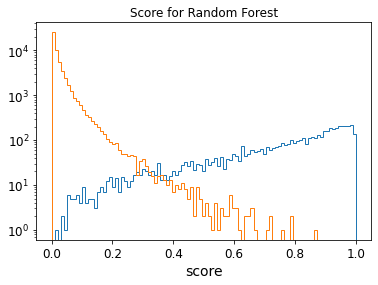

In [43]:
y_scores_only_signals_frst = y_scores_forest[y_train_5]
y_scores_only_backg_frst = y_scores_forest[~y_train_5]
#h = np.histogram(y_scores_only_signals,bins=100,range(0,1000))
plt.hist(y_scores_only_signals_frst,bins=101,range=(0.,1.),histtype="step")
plt.hist(y_scores_only_backg_frst,bins=101,range=(0.,1.),histtype="step")
plt.yscale("log")
plt.title("Score for Random Forest")
plt.xlabel("score")
plt.show()

In [44]:
indx = [i for i,y in enumerate(y_train) if y in ["3","5","8"]]
X_train_reduced = X_train[ indx]
y_train_5_reduced = y_train_5[indx]
print(X_train.shape)
print(X_train_reduced.shape)

(60000, 784)
(17339, 784)


In [45]:
forest_redx_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest_reduced = cross_val_predict(forest_redx_clf, X_train_reduced, y_train_5_reduced, cv=3,
                                    method="predict_proba")

In [46]:
y_scores_frst_redx = y_probas_forest_reduced[:, 1] # score = proba of positive class
fpr_frst_rdx, tpr_frst_rdx, thresholds_frst_redx = roc_curve(y_train_5_reduced,y_scores_frst_redx)
prec_frst_rdx, rec_frst_rdx, threshs_frst_redx = precision_recall_curve(y_train_5_reduced, y_scores_frst_redx)

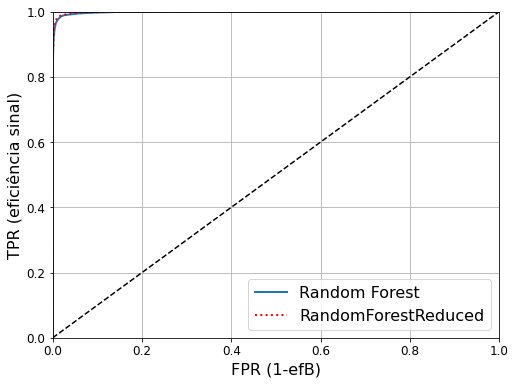

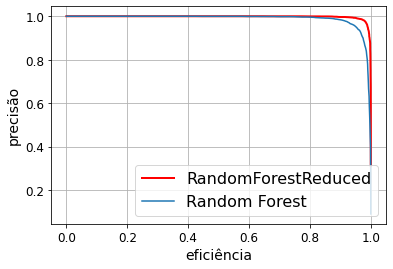

In [47]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot(fpr_frst_rdx, tpr_frst_rdx, "r:", linewidth=2, label="RandomForestReduced")

plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

plt.plot(rec_frst_rdx,prec_frst_rdx,"r",linewidth=2,label="RandomForestReduced")
plt.plot(rec_forest,prec_forest,label="Random Forest")
plt.xlabel("eficiência")
plt.ylabel("precisão")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
#from keras.utils import np_utils

# Trainign batch size
batch_size = 64
# Number of training epochs
epochs = 20
# Fraction of the training data to be used as validation
val_split = 0.3

# Learning rate
lr=0.1

X_train_mlp = X_train.astype('float32')
X_test_mlp = X_test.astype('float32')
X_train_mlp /= 255
X_test_mlp /= 255

2025-05-11 16:27:11.180649: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-11 16:27:11.475778: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
# Multilayer Perceptron model
model = Sequential()
model.add(Dense(input_dim=784, activation="relu", units=100, kernel_initializer="normal"))
model.add(Dense(activation="relu", units=30, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="relu", units=10, kernel_initializer="normal")) # after first layer no need to specify input_dim
model.add(Dense(activation="sigmoid", units=1, kernel_initializer="normal"))
model.compile(optimizer=SGD(learning_rate=lr), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,851 (319.73 KB)

 Trainable params: 81,851 (319.73 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(X_train_mlp, y_train_5, validation_split=val_split, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9110 - loss: 0.1196 - val_accuracy: 0.9094 - val_loss: 0.0816
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9132 - loss: 0.0779 - val_accuracy: 0.9094 - val_loss: 0.0775
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9109 - loss: 0.0727 - val_accuracy: 0.9094 - val_loss: 0.0603
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9233 - loss: 0.0483 - val_accuracy: 0.9676 - val_loss: 0.0254
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9777 - loss: 0.0189 - val_accuracy: 0.9818 - val_loss: 0.0151
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9844 - loss: 0.0126 - val_accuracy: 0.9815 - val_loss: 0.0152
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9868 - loss: 0.0110 - val_accuracy: 0.9873 - val_loss: 0.0106
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9901 - loss: 0.0084 - val_accuracy: 0.

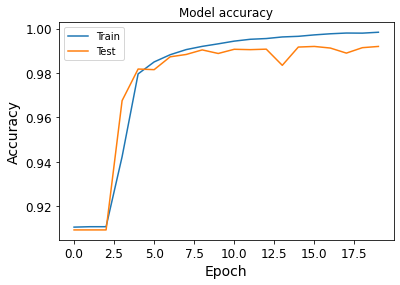

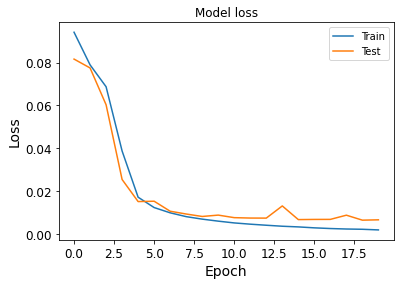

In [51]:
# Training History Visualization
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [52]:
y_predtest_mlp = model.predict(X_test_mlp)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [53]:
y_pred_mlp = model.predict(X_train_mlp)
prec_mlp, rec_mlp, thresh_mlp = precision_recall_curve(y_train_5, y_pred_mlp)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


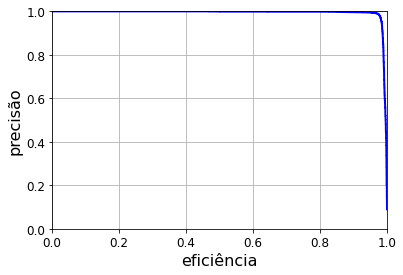

In [54]:
plot_precision_vs_recall(prec_mlp,rec_mlp)

In [55]:
fpr_mlp, tpr_mlp, threshs_mlp = roc_curve(y_train_5, y_pred_mlp)

0.9984063604411633


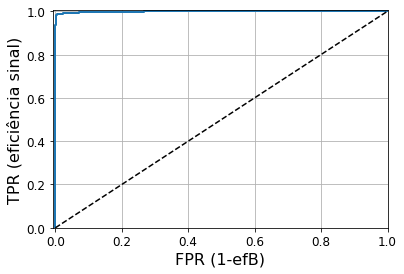

In [56]:
plot_roc_curve(fpr_mlp,tpr_mlp)
plt.axis([-0.008,1,0.0,1.004])

print(roc_auc_score(y_train_5,y_pred_mlp))

In [57]:
print(roc_auc_score(y_test_5,y_predtest_mlp))

0.9980222634608846


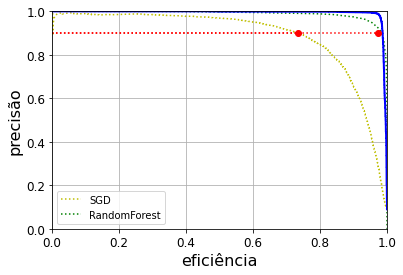

In [58]:
plt.plot(recalls,precisions,"y:",label="SGD")
plt.plot(prec_forest,rec_forest,"g:",label="RandomForest")
plot_precision_vs_recall(prec_mlp,rec_mlp)
plt.plot([0,rec_point],[0.9,0.9],"r:")
plt.plot([rec_point],[0.9],"ro")
plt.plot([0,rec_pnt_frst],[0.9,0.9],"r:")
plt.plot([rec_pnt_frst],[0.9],"ro")
plt.legend(loc="lower left")

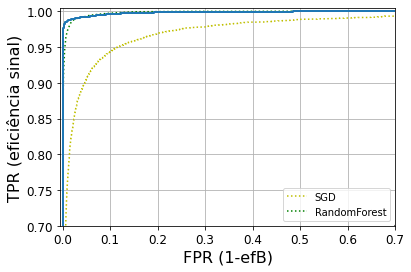

In [59]:
plt.plot(fpr,tpr,"y:",label="SGD")
plt.plot(fpr_forest,tpr_forest,"g:",label="RandomForest")
plot_roc_curve(fpr_mlp,tpr_mlp)
plt.axis([-0.005,0.7,0.7,1.004])

plt.legend(loc="lower right")

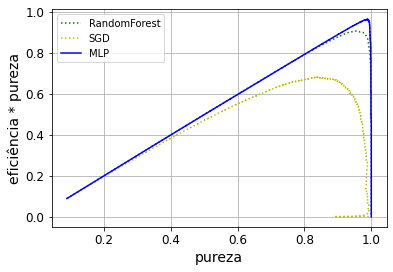

In [60]:
plt.plot(prec_forest,prec_forest*rec_forest,"g:",label="RandomForest")
plt.plot(precisions,precisions*recalls,"y:",label="SGD")
plt.plot(prec_mlp,rec_mlp*prec_mlp,"blue",label="MLP")
plt.grid(True)
plt.xlabel("pureza")
plt.ylabel("eficiência * pureza")
plt.legend(loc="upper left")
plt.show()

Melhor Eficiencia:  0.9739583333333334  Melhor precisão:  0.9886706948640483
Melhor valor do threshold:  0.49489886


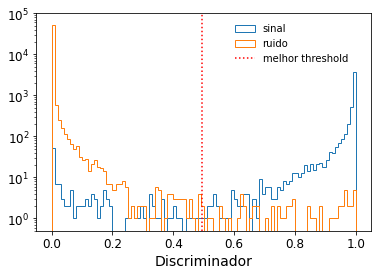

In [61]:
idxmaxeffpur = np.argmax(prec_mlp*rec_mlp)
#effpurmax = np.max(prec_mlp*rec_mlp)
#print(effpurmax,idxmaxeffpur)
print("Melhor Eficiencia: ",rec_mlp[idxmaxeffpur]," Melhor precisão: ",prec_mlp[idxmaxeffpur])
best_thresh_mlp=thresh_mlp[np.argmax(prec_mlp>=prec_mlp[idxmaxeffpur])]
print("Melhor valor do threshold: ",best_thresh_mlp)
y_pred_mlp_best = (y_pred_mlp>= best_thresh_mlp)
f1_score(y_train_5,y_pred_mlp_best)
plt.hist(y_pred_mlp[y_train_5] ,bins=100,range=(0,1),histtype='step',label="sinal")
plt.hist(y_pred_mlp[~y_train_5],bins=100,range=(0,1),histtype='step',label="ruido")
plt.plot([best_thresh_mlp,best_thresh_mlp],[0.5,1e5],"r:",label="melhor threshold")
plt.axis([-0.05,1.05,0.5,1e5])
plt.yscale("log")
plt.xlabel("Discriminador")
plt.legend(loc=(0.58,0.75),frameon=False)
plt.show()